<a href="https://colab.research.google.com/github/Wilfremorla25/Nomina-De-Empleado/blob/master/Copia_de_Create_a_DataFrame_from_PhotoQuad_Using_the_Pivot_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This library is designed to work with PhotoQuad CSV files that have been concatenated into a single file. The original CSV files are stored in a nested folder structure, where each folder name represents a specific level of your experiment's design. For example, within the folder for the year, you might have folders for the month, then for the location, then for the site, and finally for the transect.

We organize the CSV files in this way so that the "Path" column in the data captures the full directory structure. This allows us to easily generate specific time and locality columns in final dataset.

note: All the folder names need to be standarized.


In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import os

# **Load the concatenated CSV from PhotoQuad**

This code works with one CSV file that has all the data concatenated.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Matriz Final.xlsx to Matriz Final.xlsx


Create a Dataframe and assign a name to the CSV file

In [ ]:
concatenated_df= pd.read_csv('archivo_concatenado.csv')

# **Preview of the Dataframe**

In [ ]:
concatenated_df.head(1000)

,Image,Path,spp Name,spp ID,N pts per species,Cov% per species,N pts ALL species,Cov% ALL species,Reference random pts,origen
0,1.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Porites porites,12,1.0,1,100,100,100,1
1,1.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Turf,217,22.0,22,100,100,100,1
2,1.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Bare substrate,283,4.0,4,100,100,100,1
3,1.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Other phaeophyta (Fleshy algae),294,73.0,73,100,100,100,1
4,10.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Porites astreoides,62,2.0,2,100,100,100,2
...,...,...,...,...,...,...,...,...,...,...
995,2.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Bare substrate,283,46.0,46,100,100,100,212
996,2.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Other phaeophyta (Fleshy algae),294,52.0,52,100,100,100,212
997,3.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Bare substrate,283,46.0,46,100,100,100,213
998,3.jpg,C:\Users\Administrador\Desktop\Frames Tesis\20...,Other phaeophyta (Fleshy algae),294,54.0,54,100,100,100,213


Checking all the PhotoQuad points

In [ ]:
cantidad_de_puntos= concatenated_df['N pts ALL species'].sum()
print('La cantidad de puntos total es:', cantidad_de_puntos)

La cantidad de puntos total es: 957100


# *Visualizing the columns and rows**

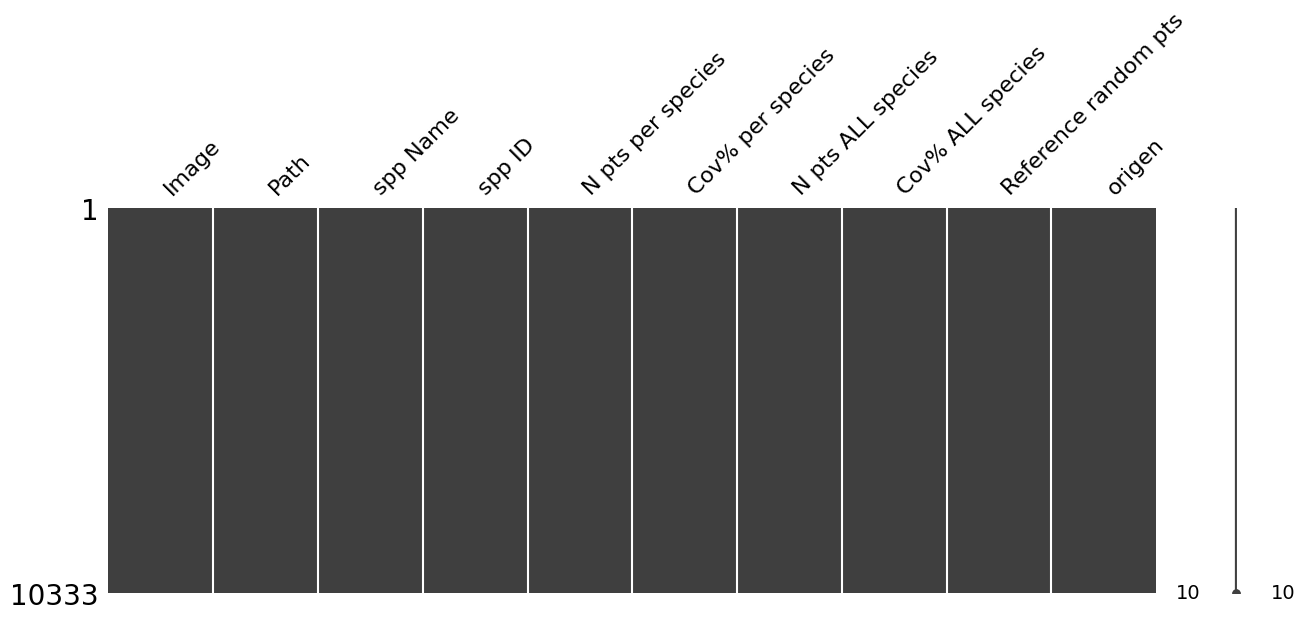

In [ ]:
msno.matrix(concatenated_df,figsize=(15,5))
plt.show()

# **Create the nested columns (year, month, location, Site, Transect, etc..) using the path column from the original dataframe and delete the latter.**

In [ ]:
concatenated_df['Path'] = concatenated_df['Path'].str.split('Tesis\\\\').str[1]
concatenated_df = concatenated_df.explode('Path').reset_index(drop=True)

In [ ]:
df_split = concatenated_df['Path'].str.split('\\', expand=True)
concatenated_df['Año'] = df_split[0]
concatenated_df['Cuatrimestre'] = df_split[1]
concatenated_df['Localidad'] = df_split[2]
concatenated_df['Sitio'] = df_split[3]
concatenated_df['Transecto'] = df_split[4]
concatenated_df.drop('Path', axis=1, inplace=True)

# **Preview of the new columns**

In [ ]:
concatenated_df.head(99900)

,Image,spp Name,spp ID,N pts per species,Cov% per species,N pts ALL species,Cov% ALL species,Reference random pts,origen,Año,Cuatrimestre,Localidad,Sitio,Transecto
0,1.jpg,Porites porites,12,1.0,1,100,100,100,1,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1
1,1.jpg,Turf,217,22.0,22,100,100,100,1,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1
2,1.jpg,Bare substrate,283,4.0,4,100,100,100,1,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1
3,1.jpg,Other phaeophyta (Fleshy algae),294,73.0,73,100,100,100,1,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1
4,10.jpg,Porites astreoides,62,2.0,2,100,100,100,2,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,10.jpg,Other (Sponge massive),159,4.0,4,100,100,100,2002,2023,3 cuatrimestre,Terrenas,Cayo Jackson 3,Transecto 3
10329,10.jpg,Other (Sponge encrusting),185,4.0,4,100,100,100,2002,2023,3 cuatrimestre,Terrenas,Cayo Jackson 3,Transecto 3
10330,10.jpg,Turf,217,37.0,37,100,100,100,2002,2023,3 cuatrimestre,Terrenas,Cayo Jackson 3,Transecto 3
10331,10.jpg,Bare substrate,283,32.0,32,100,100,100,2002,2023,3 cuatrimestre,Terrenas,Cayo Jackson 3,Transecto 3


# **Create the new DataFrame where we put the species as columns and fulfill the rows with the cover per specie**

In [ ]:
cover_result = concatenated_df.pivot_table(index=["Image", "origen", "Año", "Cuatrimestre", "Localidad", "Sitio", "Transecto"],
                                      columns="spp Name", values="Cov% ALL species", fill_value=0).reset_index()

**Check the number of columns and rows to prove the change**

In [ ]:
concatenated_df.shape

(10333, 14)

In [ ]:
cover_result.shape

(2212, 109)

# **Preview of the new dataframe**

In [ ]:
cover_result.head(100000)

spp Name,Image,origen,Año,Cuatrimestre,Localidad,Sitio,Transecto,Acetabularia,Acropora cervicornis,Agaricia agaricites (agaricites),...,Siderastrea siderea,Siderastrea sp.,Solenastrea sp.,Stephanocoenia intersepta,Thalassia testudinum,Tunicates,Turf,Verongula sp.,Xetospongia sp.,Zoanthus sp.
15,1.jpg,1,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1,0,0,0,...,0,0,0,0,0,0,22,0,0,0
238,10.jpg,2,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
459,2.jpg,3,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1,0,0,0,...,0,0,0,1,0,0,32,0,0,0
681,3.jpg,4,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,4.jpg,5,2021,1 cuatrimestre,Galeras,Carriles 1,Transecto 1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,8.1.jpg,2000,2023,3 cuatrimestre,Terrenas,Cayo Jackson 3,Transecto 3,0,0,0,...,0,0,0,0,0,0,3,0,0,0
1991,8.jpg,2000,2023,3 cuatrimestre,Terrenas,Cayo Jackson 3,Transecto 3,0,0,0,...,0,0,0,0,0,5,2,0,0,0
2009,9.1.jpg,2001,2023,3 cuatrimestre,Terrenas,Cayo Jackson 3,Transecto 3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2211,9.jpg,2001,2023,3 cuatrimestre,Terrenas,Cayo Jackson 3,Transecto 3,0,0,0,...,0,0,0,0,0,0,26,0,0,0


# **Check that the columns created through the PATH method are standardized**

In case the columns are not properly standardized, a replace function should be applied as needed.

In [ ]:
cover_result["Cuatrimestre"].unique()

array(['1 cuatrimestre', '2 cuatrimestre', '3 cuatrimestre',
       '1 cuatrimestre (Haciendo Terrenas en el trabajo)',
       'Cuatrimestre 2'], dtype=object)

In [ ]:
cover_result["Localidad"].unique()

array(['Galeras', 'Samana', 'Terrenas',
       'Terrenas (Confirmar que son los correctos)', 'Terremas',
       'Bahia de Samana', 'Las Terrenas'], dtype=object)

In [ ]:
cover_result["Sitio"].unique()

array(['Carriles 1', 'Carriles 2', 'Fronton', 'Carenero', 'Cayo Arena',
       'Ferry', 'Carriles II', 'Cayo Jackson 1', 'Cayo Jackson 2',
       'Cayo Jackson 3', 'Carriles I', 'Cayo Arena Samana', 'Ferri'],
      dtype=object)

In [ ]:
cover_result["Transecto"].unique()

array(['Transecto 1', 'Transecto 2', 'Transecto 3', 'Transecto 4',
       'Transecto 5', 'Transecto 6', 'transecto 1', 'transecto 2',
       'transecto 3'], dtype=object)

# **Visualize the new dataframe**

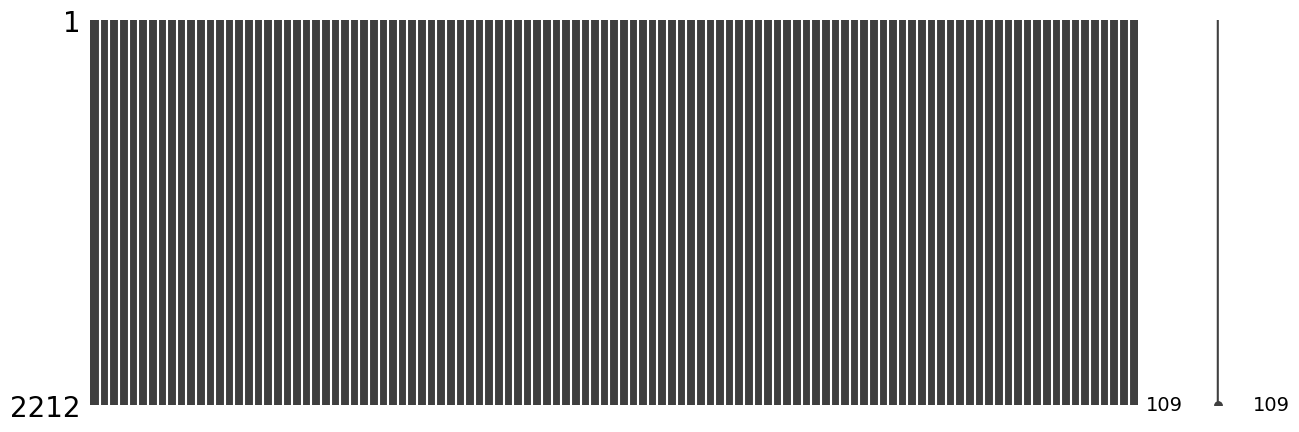

In [ ]:
msno.matrix(cover_result,figsize=(15,5))
plt.show()

In [ ]:
cover_result = cover_result.groupby('origen').sum()

In [ ]:
cover_result.head(10000)

spp Name,Image,Año,Cuatrimestre,Localidad,Sitio,Transecto,Acetabularia,Acropora cervicornis,Agaricia agaricites (agaricites),Agaricia agaricites (carinata),...,Siderastrea siderea,Siderastrea sp.,Solenastrea sp.,Stephanocoenia intersepta,Thalassia testudinum,Tunicates,Turf,Verongula sp.,Xetospongia sp.,Zoanthus sp.
origen,,,,,,,,,,,,,,,,,,,,,
1,1.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,0,0,0,22,0,0,0
2,10.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,1,0,0,32,0,0,0
4,3.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,6.1.jpg6.jpg,2023,Cuatrimestre 3,Terrenas,Cayo Jackson 3,Transecto 3,0,0,0,6,...,0,0,0,0,0,0,37,0,0,0
1999,7.jpg,2023,Cuatrimestre 3,Terrenas,Cayo Jackson 3,Transecto 3,0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
2000,8.1.jpg8.jpg,2023,Cuatrimestre 3,Terrenas,Cayo Jackson 3,Transecto 3,0,0,0,6,...,0,0,0,0,0,5,5,0,0,0


In [ ]:
cover_result["Año"].unique()

array(['2021', '2022', '20222022', '2023', '20232023', '202320232023'],
      dtype=object)

In [ ]:
cover_result["Cuatrimestre"].unique()

array(['Cuatrimestre 1', 'Cuatrimestre 2', 'Cuatrimestre 3',
       'Cuatrimestre 1Cuatrimestre 1', 'Cuatrimestre 3Cuatrimestre 3',
       'Cuatrimestre 2Cuatrimestre 2',
       'Cuatrimestre 2Cuatrimestre 2Cuatrimestre 2'], dtype=object)

In [ ]:
cover_result["Localidad"].unique()

array(['Galeras', 'Bahia de Samana', 'Terrenas',
       'Bahia de SamanaBahia de Samana',
       'Bahia de SamanaBahia de SamanaBahia de Samana', 'GalerasGaleras',
       'TerrenasTerrenas'], dtype=object)

In [ ]:
cover_result["Sitio"].unique()

array(['Carriles 1', 'Carriles 2', 'Fronton', 'Carenero', 'Cayo Arena',
       'Ferry', 'Cayo Jackson 1', 'Cayo Jackson 2', 'Cayo Jackson 3',
       'CareneroCarenero', 'Cayo ArenaCayo Arena',
       'CareneroCareneroCarenero', 'FerryFerry', 'Carriles 2Carriles 2',
       'FrontonFronton', 'Cayo Jackson 1Cayo Jackson 1',
       'Cayo Jackson 2Cayo Jackson 2', 'Cayo Jackson 3Cayo Jackson 3'],
      dtype=object)

In [ ]:
cover_result["Transecto"].unique()

array(['Transecto 1', 'Transecto 2', 'Transecto 3', 'Transecto 4',
       'Transecto 5', 'Transecto 6', 'Transecto 2Transecto 2',
       'Transecto 1Transecto 2', 'Transecto 1Transecto 1',
       'Transecto 1Transecto 1Transecto 1', 'Transecto 3Transecto 3'],
      dtype=object)

# **Download in Excel File**

In [ ]:
ruta_del_archivo = "/content/cover_result_summed.xlsx"
cover_result_summed.to_excel(ruta_del_archivo, index=True)
if os.path.exists(ruta_del_archivo):
    print(f"El DataFrame se ha guardado en '{ruta_del_archivo}' en formato XLSX")
else:
    print("Hubo un problema al guardar el DataFrame en formato XLSX.")

from google.colab import files
files.download('/content/cover_result_summed.xlsx')

In [ ]:
from google.colab import files
files.download('/content/cover_result.xlsx')

# **DataFrame with lower taxonomic specificity.**






 **Use the replace function for the premade PhotoQuad Library to change the taxonomy specificity**

In [ ]:
species_to_group_mapping = {
    "Acropora cervicornis": "Scleractinian",
    "Acropora palmata": "Scleractinian",
    "Acropora prolifera": "Scleractinian",
    "Acropora sp.": "Scleractinian",
    "Madracis carmabi": "Scleractinian",
    "Madracis formosa": "Scleractinian",
    "Madracis mirabilis": "Scleractinian",
    "Madracis sp.": "Scleractinian",
    "Oculina diffusa": "Scleractinian",
    "Porites divaricata": "Scleractinian",
    "Porites furcata": "Scleractinian",
    "Porites porites": "Scleractinian",
    "Porites sp.": "Scleractinian",
    "Other Scleractinian":  "Scleractinian",
    "Agaricia agaricites (purpurea)": "Scleractinian ",
    "Agaricia fragilis": "Scleractinian",
    "Agaricia grahamae": "Scleractinian",
    "Agaricia lamarcki": "Scleractinian",
    "Agaricia sp.": "Scleractinian",
    "Agaricia undata": "Scleractinian",
    "Dichocoenia stokesii": "Scleractinian ",
    "Leptosteris cucullata": "Scleractinian ",
    "Meandrina jacksoni": "Scleractinian ",
    "Meandrina meandrites": "Scleractinian ",
    "Mycetophyllia aliciae": "Scleractinian ",
    "Mycetophyllia daniana": "Scleractinian ",
    "Mycetophyllia ferox": "Scleractinian ",
    "Mycetophyllia lamarckiana": "Scleractinian ",
    "Mycetophyllia reesi": "Scleractinian ",
    "Mycetophyllia sp.": "Scleractinian ",
    "Porites astreoides": "Scleractinian ",
    "Porites sp.": "Scleractinian",
    "Pseudodiploria clivosa": "Scleractinian",
    "Pseudodiploria strigosa": "Scleractinian",
    "Other (Scleractinian plate)": "Scleractinian",
    "Agaricia agaricites (carinata)": "Scleractinian",
    "Agaricia agaricites (danai)": "Scleractinian",
    "Agaricia sp.": "Scleractinian",
    "Agaricia tenuifolia": "Scleractinian",
    "Other (Scleractinian foliose)": "Scleractinian",
    "Agaricia agaricites (agaricites)": "Scleractinian",
    "Agaricia humilis": "Scleractinian",
    "Colpophyllia natans": "Scleractinian",
    "Dichocoenia stokesii": "Scleractinian",
    "Diploria labyrinthiformis": "Scleractinian",
    "Favia fragum": "Scleractinian",
    "Isophyllia rigida": "Scleractinian",
    "Isophyllia sinuosa": "Scleractinian",
    "Isophyllia sp.": "Scleractinian",
    "Madracis senaria": "Scleractinian",
    "Manicina aerolata": "Scleractinian",
    "Meandrina danae": "Scleractinian",
    "Meandrina jacksoni": "Scleractinian",
    "Meandrina meandrites": "Scleractinian",
    "Meandrina sp.": "Scleractinian",
    "Montastrea cavernosa": "Scleractinian",
    "Mycetophyllia lamarckiana": "Scleractinian",
    "Orbicella annularis": "Scleractinian",
    "Orbicella faveolata": "Scleractinian",
    "Orbicella franksi": "Scleractinian",
    "Orbicella sp.": "Scleractinian",
    "Porites astreoides": "Scleractinian",
    "Porites branneri": "Scleractinian",
    "Pseudodiploria clivosa": "Scleractinian",
    "Pseudodiploria strigosa": "Scleractinian",
    "Siderastrea radians": "Scleractinian",
    "Siderastrea siderea": "Scleractinian",
    "Siderastrea sp.": "Scleractinian",
    "Solenastrea bournoni": "Scleractinian",
    "Solenastrea hyades": "Scleractinian",
    "Solenastrea sp.": "Scleractinian",
    "Stephanocoenia intersepta": "Scleractinian",
    "Other (Scleractinian massive)": "Scleractinian",
    "Dendrogyra cylindrus": "Scleractinian",
    "Orbicella faveolata": "Scleractinian",
    "Other (Scleractinian pillar)": "Scleractinian",
    "Scolymia cubensis": "Scleractinian",
    "Scolymia lacera": "Scleractinian",
    "Scolymia sp.": "Scleractinian",
    "Mussa angulosa": "Scleractinian",
    "Other (Scleractinian solitary/ other)": "Scleractinian",
    "Acropora palmata": "Scleractinian",
    "Acropora prolifera": "Scleractinian",
    "Acropora sp.": "Scleractinian",
    "Agaricia agaricites (agaricites)": "Scleractinian",
    "Agaricia fragilis": "Scleractinian",
    "Agaricia humilis": "Scleractinian",
    "Agaricia sp.": "Scleractinian",
    "Dendrogyra cylindrus": "Scleractinian",
    "Madracis decactis": "Scleractinian",
    "Madracis pharensis": "Scleractinian",
    "Madracis senaria": "Scleractinian",
    "Meandrina jacksoni": "Scleractinian",
    "Mycetophyllia ferox": "Scleractinian",
    "Porites astreoides": "Scleractinian",
    "Porites sp.": "Scleractinian",
    "Pseudodiploria clivosa": "Scleractinian",
    "Pseudodiploria strigosa": "Scleractinian",
    "Siderastrea radians": "Scleractinian",
    "Siderastrea siderea": "Scleractinian",
    "Siderastrea sp.": "Scleractinian",
    "Stephanocoenia intersepta": "Scleractinian",
    "Other (Scleractinian encrusting)": "Scleractinian",
    "Madracis decactis": "Scleractinian",
    "Madracis pharensis": "Scleractinian",
    "Other (Scleractinian knobby)": "Scleractinian",
    "Cladocora arbuscula": "Scleractinian",
    "Eusmilia fastigata": "Scleractinian",
    "Other (Scleractinian flower cup)": "Scleractinian",
    "Acropora palmata": "Scleractinian",
    "Porites sp.": "Scleractinian",
    "Mycetophyllia ferox": "Scleractinian",
    "Other (Scleractinian flower cup)": "Scleractinian",
        "Briareum asbestinum": "Octocorals",
    "Eunicea sp.": "Octocorals",
    "Gorgonia sp.": "Octocorals",
    "Muricea sp.": "Octocorals",
    "Muriocepsis sp.": "Octocorals",
    "Plexaura sp.": "Octocorals",
    "Plexaurella sp.": "Octocorals",
    "Pseudoplexaura sp.": "Octocorals",
    "Pseudopterogorgia sp.": "Octocorals",
    "Pterogorgia sp.": "Octocorals",
    "Other (Octocorals erect)": "Octocorals",
    "Briareum asbestinum": "Octocorals",
    "Erythropodium caribaeorum": "Octocorals",
    "Other (octocoral encrusting)": "Octocorals",
    "Cirrhipathes luetkeni": "Antipatharia",
    "Other (Antipatharia)": "Antipatharia",
    "Millepora alcicornis": "Hidrocorals",
    "Millepora complanata": "Hidrocorals",
    "Millepora squarrosa": "Hidrocorals",
    "Millepora sp.": "Hidrocorals",
    "Stylaster": "Hidrocorals",
    "Other (Hidrocoral)": "Hidrocorals",
    "Palythoa caribbaeorum": "Zoanthids",
    "Zoanthus sp.": "Zoanthids",
    "Agelas sp.": "Sponge",
    "Amphimedon sp.": "Sponge",
    "Aplysina sp.": "Sponge",
    "Callyspongia sp.": "Sponge",
    "Cinachyra sp.": "Sponge",
    "Clathria": "Sponge",
    "Cliona aprica (tenuis)": "Sponge",
    "Cliona cliona": "Sponge",
    "Cliona delitryx": "Sponge",
    "Cliona sp.": "Sponge",
    "Desmapsamma sp.": "Sponge",
    "Diplastrella sp.": "Sponge",
    "Halisarca sp.": "Sponge",
    "Ircinia sp.": "Sponge",
    "Monanchora sp.": "Sponge",
    "Mycale sp.": "Sponge",
    "Niphates erecta": "Sponge",
    "Niphates sp.": "Sponge",
    "Phorbas sp.": "Sponge",
    "Plakortis sp.": "Sponge",
    "Ptilocaulis sp.": "Sponge",
    "Smenospongia sp.": "Sponge",
    "Spirastrella sp.": "Sponge",
    "Verongula rigida": "Sponge",
    "Verongula sp.": "Sponge",
    "Other (Sponge massive)": "Sponge",
    "Agelas sp.": "Sponge",
    "Amphimedon sp.": "Sponge",
    "Aplysina sp.": "Sponge",
    "Callyspongia sp.": "Sponge",
    "Cinachyra sp.": "Sponge",
    "Clathria": "Sponge",
    "Cliona aprica (tenuis)": "Sponge",
    "Cliona cliona": "Sponge",
    "Cliona delitryx": "Sponge",
    "Cliona sp.": "Sponge",
    "Desmapsamma sp.": "Sponge",
    "Diplastrella sp.": "Sponge",
    "Halisarca sp.": "Sponge",
    "Ircinia sp.": "Sponge",
    "Monanchora sp.": "Sponge",
    "Mycale sp.": "Sponge",
    "Niphates erecta": "Sponge",
    "Niphates sp.": "Sponge",
    "Phorbas sp.": "Sponge",
    "Plakortis sp.": "Sponge",
    "Ptilocaulis sp.": "Sponge",
    "Smenospongia sp.": "Sponge",
    "Spirastrella sp.": "Sponge",
    "Verongula rigida": "Sponge",
    "Verongula sp.": "Sponge",
    "Other (Sponge encrusting)": "Sponge",
    "Agelas sp.": "Sponge",
    "Aiolochroia sp.": "Sponge",
    "Amphimedon sp.": "Sponge",
    "Aplysina sp.": "Sponge",
    "Callyspongia sp.": "Sponge",
    "Cinachyra sp.": "Sponge",
    "Clathria": "Sponge",
    "Cliona aprica (tenuis)": "Sponge",
    "Cliona cliona": "Sponge",
    "Cliona delitryx": "Sponge",
    "Cliona sp.": "Sponge",
    "Desmapsamma sp.": "Sponge",
    "Diplastrella sp.": "Sponge",
    "Halisarca sp.": "Sponge",
    "Ircinia sp.": "Sponge",
    "Monanchora sp.": "Sponge",
    "Mycale sp.": "Sponge",
    "Niphates erecta": "Sponge",
    "Niphates sp.": "Sponge",
    "Phorbas sp.": "Sponge",
    "Plakortis sp.": "Sponge",
    "Ptilocaulis sp.": "Sponge",
    "Smenospongia sp.": "Sponge",
    "Spirastrella sp.": "Sponge",
    "Verongula rigida": "Sponge",
    "Verongula sp.": "Sponge",
    "Other (Sponge erect)": "Sponge",
    "Cyanobacteria": "Algae",
    "Turf": "Algae",
    "Other (Algae)": "Algae",
    "Acetabularia": "Fleshy algae",
    "Asparagopsis taxiformis": "Fleshy algae",
    "Caulerpa racemosa": "Fleshy algae",
    "Caulerpa sertularioides": "Fleshy algae",
    "Caulerpa sp.": "Fleshy algae",
    "Dictyota sp.": "Fleshy algae",
    "Dyctiopteris sp.": "Fleshy algae",
    "Dyctiosphaeria sp.": "Fleshy algae",
    "Enteromorpha sp.": "Fleshy algae",
    "Galaxaura sp.": "Calcareous algae",
    "Gracilaria sp.": "Fleshy algae",
    "Hannia sp.": "Calcareous algae",
    "Lobophora variegata": "Fleshy algae",
    "Padina sp.": "Fleshy algae",
    "Sargassum sp.": "Fleshy algae",
    "Stypoponium sp.": "Fleshy algae",
    "Ulva sp.": "Fleshy algae",
    "Ventricaria sp.": "Fleshy algae",
    "Other clorophyta (Fleshy algae)": "Fleshy algae",
    "Other rhodophyta (Fleshy algae)": "Fleshy algae",
    "Other phaeophyta (Fleshy algae)": "Fleshy algae",
    "Other (Fleshy algae)": "Fleshy algae",
    "Halodule wrightii": "Seagrass",
    "Halophila decipiens": "Seagrass",
    "Halophila engelmanni": "Seagrass",
    "Halophila johnsonii": "Seagrass",
    "Ruppia maritima": "Seagrass",
    "Syringodium filiforme": "Seagrass",
    "Thalassia testudinum": "Seagrass",
    "Other (seagrass)": "Seagrass",
    "Actinaria": "Other invertebrates",
    "Corallimorpharia": "Other invertebrates",
    "Diadema antillarum": "Other invertebrates",
    "Bivalves": "Other invertebrates",
    "Gasteropods": "Other invertebrates",
    "Other moluscs": "Other invertebrates",
    "Holothuroidea": "Other invertebrates",
    "Spirobranchius sp.": "Other invertebrates",
    "Other polychaete": "Other invertebrates",
    "Tunicates": "Other invertebrates",
    "Other (Other invertebrates)": "Other invertebrates",
    "Biotic (unknown)": "Unknown",
    "Dead calcareous algae": "Abiotic",
    "Dead coral": "Abiotic",
    "Dead octocoral": "Abiotic",
    "Dead sponge": "Abiotic",
    "Gap": "Abiotic",
    "Rock": "Abiotic",
    "Rubble": "Abiotic",
    "Sand": "Abiotic",
    "Trash": "Abiotic",
    "Unknown": "Abiotic",
    "Artifact": "Abiotic",
    "Echinoidea": "Other invertebrates",
    "Echinometra sp.": "Other invertebrates",
    "Hydroidolina": "Other invertebrates",
    "Palythoa sp.": "Zoanthids",
    "Zoanthus pulchellus": "Zoanthids",
    "Bare substrate": "Abiotic",
    "Trichogloea sp.": "Fleshy algae",
    "Scyphozoa (medusae)": "Other invertebrates",
    "Debris": "Abiotic",
    "Halophila sp.": "Seagrass",
    "Neofibularia": "Sponge",
    "Turbinaria sp.": "Fleshy algae",
    "Crustose coraline": "Calcareous algae",
    "Batophora sp.": "Fleshy algae",
    "Halimeda sp.": "Calcareous algae",
    "Rhipocephalus sp.": "Calcareous algae",
    "Rhipiliopsis sp.": "Calcareous algae",
    "Rhipilia sp.": "Calcareous algae",
    "Jania sp.": "Calcareous algae",
    "Amphiroa sp.": "Calcareous algae",
    "Udotea sp.": "Calcareous algae",
    "Penicillus sp.": "Calcareous algae",
    "Neomeris sp.": "Calcareous algae",
    "Cymopolia sp.": "Calcareous algae",
    "Codium sp.": "Calcareous algae",
    "Other (Calcareous algae)": "Calcareous algae",
    "Other rhodophyta (Calcareous algae)": "Calcareous algae",
    "Other clorophyta (Calcareous algae)": "Calcareous algae",
    "Mud": "Abiotic",
    "Xetospongia sp.": "Sponge",
    "Dead hidrocoral": "Abiotic",
    "Palythoa grandis": "Zoanthids",
    "Palythoa grandiflora": "Zoanthids",
    "Eucheuma": "Fleshy algae",
    "Clavelina sp.": "Other invertebrates",
    "Pseudodiploria sp.": "Scleractinian",
    "Tubastrea sp.": "Scleractinian",
    "Tubastrea coccinea": "Scleractinian",
    "Muriceopsis flavida": "Octocorals",
    "Peyssonnelia sp.": "Calcareous algae",
    "Vermetids": "Other invertebrates",
    "Barnacle": "Other invertebrates",
    "Moluscs": "Other invertebrates",
    "Other encrusting organism": "Other invertebrates",
    "Other coral recruit": "Other invertebrates",
}


Use the map function to replace the names of the species for the groups

In [ ]:
cover_result.rename(columns=species_to_group_mapping, inplace=True)

# **Preview of the new column**

In [ ]:
cover_result.head()

spp Name,Image,Año,Cuatrimestre,Localidad,Sitio,Transecto,Fleshy algae,Scleractinian,Scleractinian,Scleractinian,...,Scleractinian,Scleractinian,Scleractinian,Scleractinian,Seagrass,Other invertebrates,Algae,Sponge,Sponge,Zoanthids
origen,,,,,,,,,,,,,,,,,,,,,
1,1.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,0,0,0,22,0,0,0
2,10.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,1,0,0,32,0,0,0
4,3.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.jpg,2021,Cuatrimestre 1,Galeras,Carriles 1,Transecto 1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Download in Excel File**

In [ ]:
ruta_del_archivo = "/content/cover_result_summed.xlsx"
cover_result_summed.to_excel(ruta_del_archivo, index=True)
if os.path.exists(ruta_del_archivo):
    print(f"El DataFrame se ha guardado en '{ruta_del_archivo}' en formato XLSX")
else:
    print("Hubo un problema al guardar el DataFrame en formato XLSX.")

from google.colab import files
files.download('/content/cover_result_summed.xlsx')

In [ ]:
from google.colab import files
files.download('/content/cover_result.xlsx')